In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/crop_production.csv")   # area is in sq m
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


## **Data Visualization**

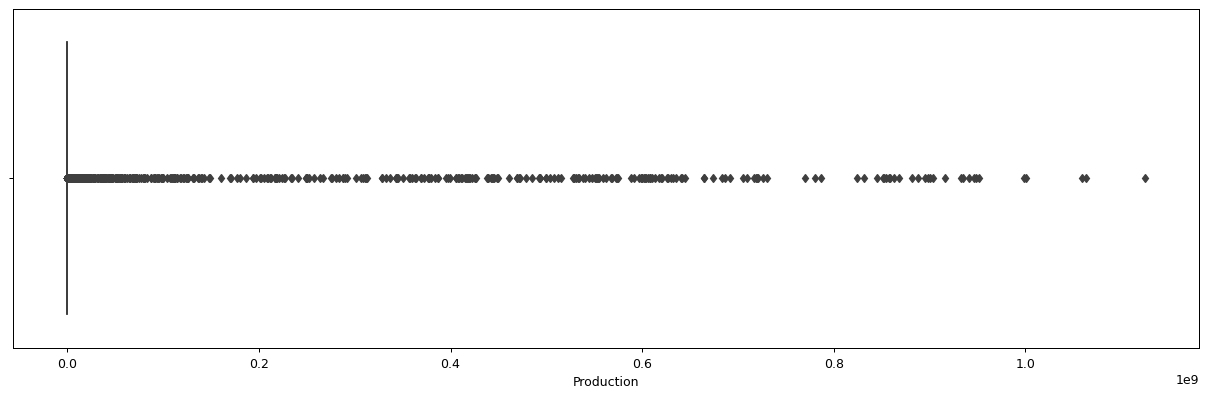

In [ ]:
plt.figure(figsize=(17,5),dpi=90)
sns.boxplot(x=df["Production"])

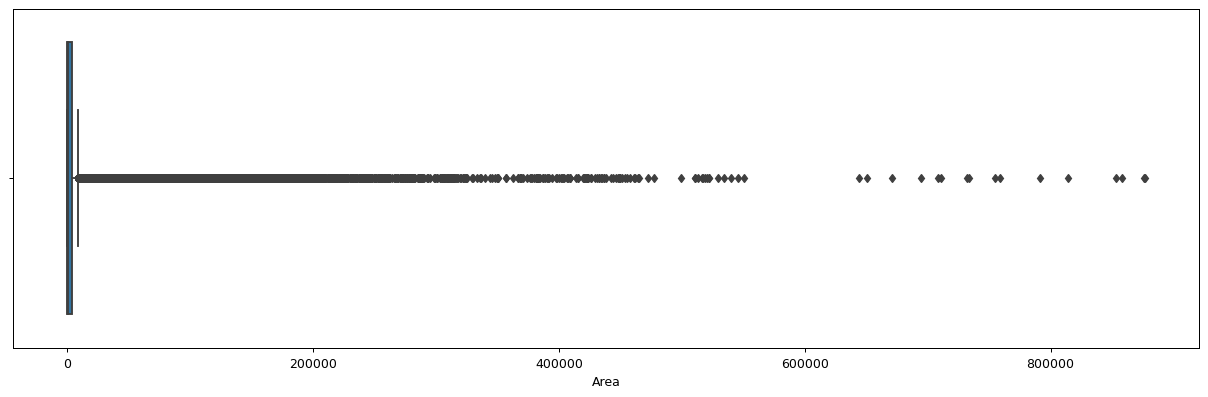

In [ ]:
plt.figure(figsize=(17,5),dpi=90)
sns.boxplot(x=df["Area"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


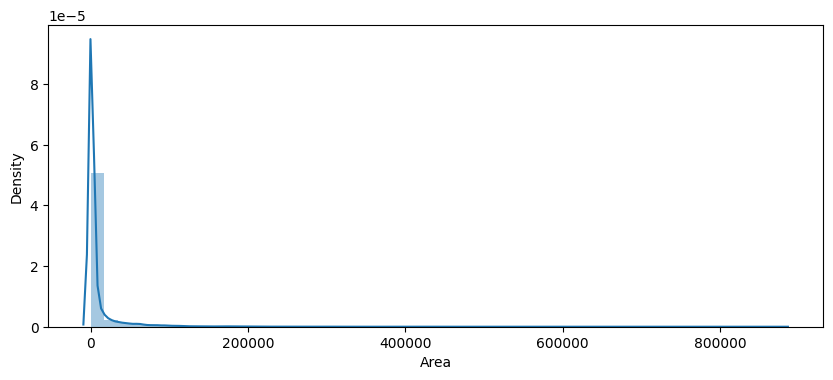

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.distplot(df['Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


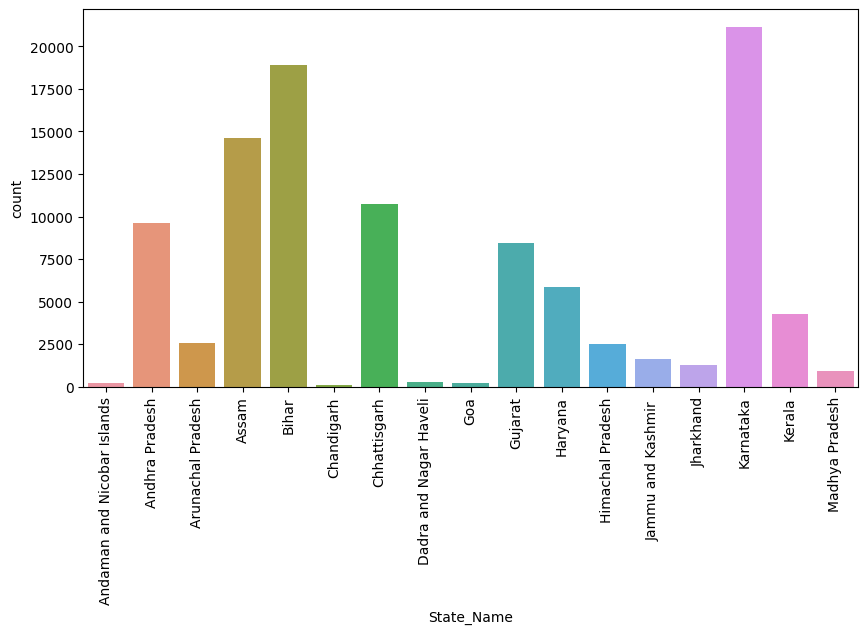

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
plt.xticks(rotation='vertical')
sns.countplot(df['State_Name'])

**Inference**: Uttar Pradesh, Karnataka, Madhya Pradesh are the top agricultural states in India due to high-yielding varieties of seed, greater availability of fertilizers and increased use of irrigation.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


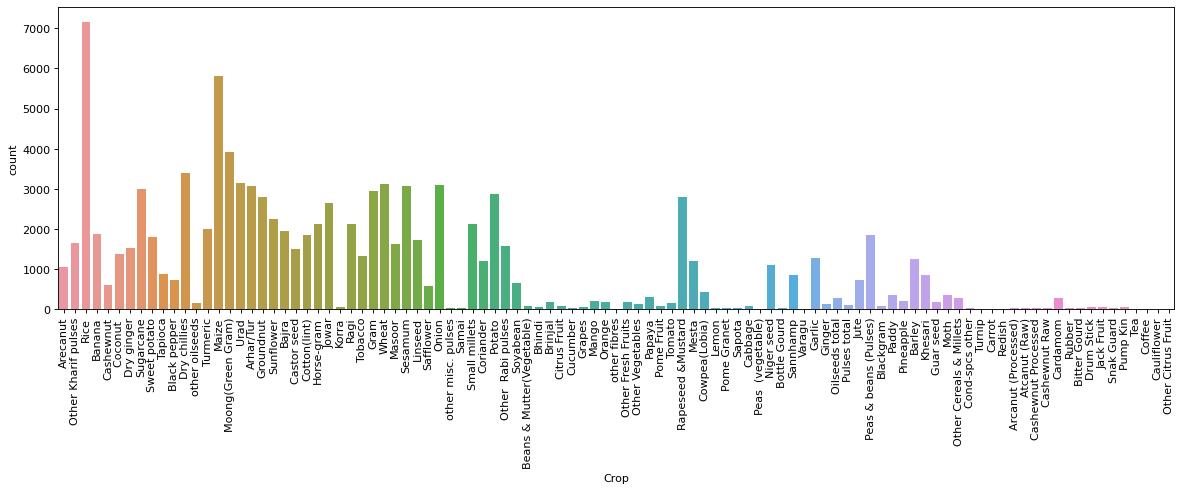

In [ ]:
plt.figure(figsize=(18,5),dpi=80)
plt.xticks(rotation='vertical')
sns.countplot(df['Crop'])

**Inference**: Top 5 crops grown in India are Maize,Rice,Moong,Urad,Sesamum 


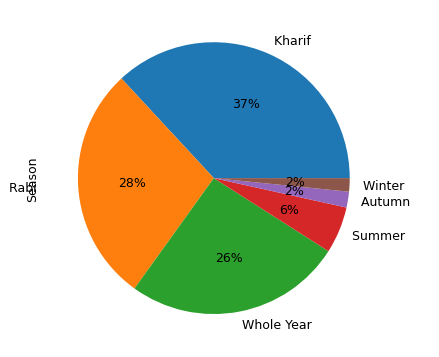

In [ ]:
plt.figure(figsize=(10,5),dpi=90)
df['Season'].value_counts().plot(kind='pie',autopct="%1.0f%%")

**Inference**:In most parts of India Kharif and Rabi are the season for cultivation whereas Autumn and Winter are least and In few places crops are grown whole year.


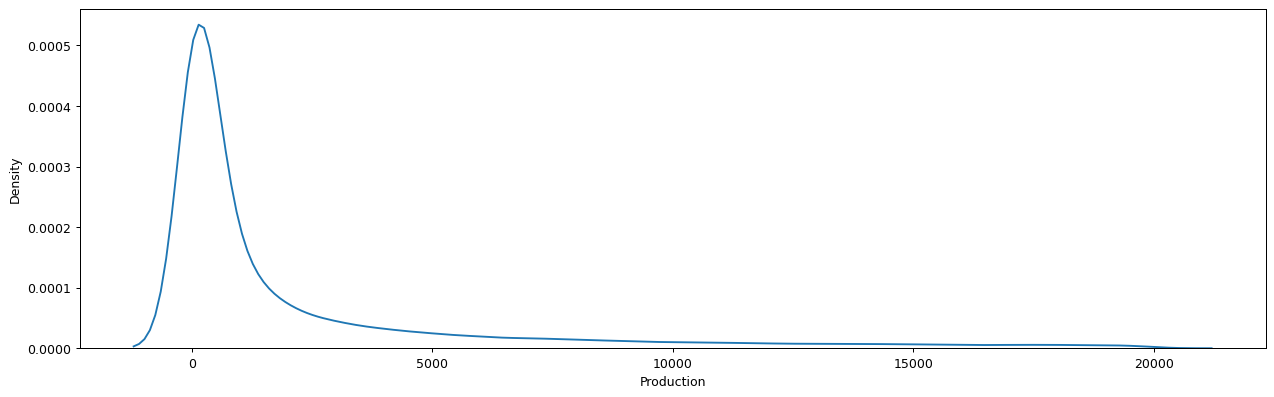

In [ ]:
plt.figure(figsize=(17,5),dpi=90)
sns.kdeplot(df[df['Production']<20000]['Production'])

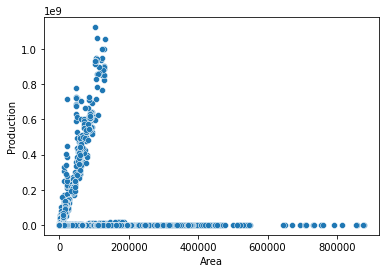

In [ ]:
sns.scatterplot(x='Area',y="Production",data=df)

**Inference**: There are outliers in Area,if we exclude them and interpret graph, as Area increases crop production appears to be increasing

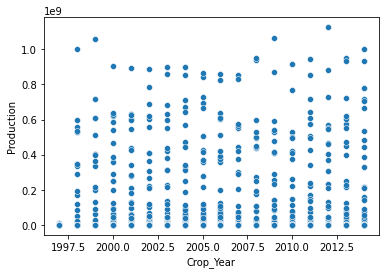

In [ ]:
sns.scatterplot(x='Crop_Year',y="Production",data=df)

**Inference**: There is no significant downfall of crop production in any year

## **Data Preprocessing**

In [ ]:
df[df["Production"]==0]
df['Production'] = df['Production'].replace([0.0],np.NaN)

In [ ]:
df.drop(['Crop_Year','District_Name'],axis=1,inplace=True)

In [ ]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

State_Name    0
Season        0
Crop          0
Area          0
Production    0
dtype: int64

In [ ]:
df.drop(df[ df['Area']> 100000 ].index,axis=0,inplace=True)
df.shape

(98008, 5)

In [ ]:
df.head()

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0


### **As we have nominal variables,we use one hot encoding**

To prevent dummy variable trap we had to remove one of the column.

In [ ]:
state = df["State_Name"]
state = pd.get_dummies(state,drop_first=True)
state.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
season = df["Season"]

season = pd.get_dummies(season,drop_first=True)
season.head()

,Kharif,Rabi,Summer,Whole Year,Winter
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
crop = df["Crop"]

crop = pd.get_dummies(crop,drop_first=True)
crop.head()

,Arecanut,Arhar/Tur,Atcanut (Raw),Bajra,Banana,Barley,Beans & Mutter(Vegetable),Bhindi,Black pepper,Blackgram,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Citrus Fruit,Coconut,Coffee,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jowar,Jute,Khesari,Korra,...,Orange,Other Rabi pulses,Other Cereals & Millets,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Paddy,Papaya,Peas & beans (Pulses),Pineapple,Pome Fruit,Pome Granet,Potato,Pulses total,Ragi,Rapeseed &Mustard,Redish,Rice,Rubber,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Turmeric,Turnip,Urad,Varagu,Wheat,other misc. pulses,other oilseeds
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = pd.concat([df,crop,state,season], axis = 1)
data.head()

,State_Name,Season,Crop,Area,Production,Arecanut,Arhar/Tur,Atcanut (Raw),Bajra,Banana,Barley,Beans & Mutter(Vegetable),Bhindi,Black pepper,Blackgram,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Citrus Fruit,Coconut,Coffee,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,...,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Turmeric,Turnip,Urad,Varagu,Wheat,other misc. pulses,other oilseeds,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Kharif,Rabi,Summer,Whole Year,Winter
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


As these nominal columns are no longer used,we drop them

In [ ]:
data.drop(['Season','State_Name','Crop'],axis=1,inplace=True)
data.head()

,Area,Production,Arecanut,Arhar/Tur,Atcanut (Raw),Bajra,Banana,Barley,Beans & Mutter(Vegetable),Bhindi,Black pepper,Blackgram,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Citrus Fruit,Coconut,Coffee,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jowar,Jute,...,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Turmeric,Turnip,Urad,Varagu,Wheat,other misc. pulses,other oilseeds,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Kharif,Rabi,Summer,Whole Year,Winter
0,1254.0,2000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,102.0,321.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,176.0,641.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,720.0,165.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
scaled_features = data.copy()
from sklearn.preprocessing import StandardScaler
col_names = ['Area','Production']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

scaled_features.head(5)

,Area,Production,Arecanut,Arhar/Tur,Atcanut (Raw),Bajra,Banana,Barley,Beans & Mutter(Vegetable),Bhindi,Black pepper,Blackgram,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Citrus Fruit,Coconut,Coffee,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jowar,Jute,...,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Turmeric,Turnip,Urad,Varagu,Wheat,other misc. pulses,other oilseeds,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Kharif,Rabi,Summer,Whole Year,Winter
0,-0.323324,-0.046621,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.408744,-0.046722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.401921,-0.046706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.396873,-0.046690,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.359757,-0.046714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y=scaled_features['Production']
X=scaled_features.drop('Production',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

In [ ]:
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  0.20875977716813945
Accuracy on Testing set:  0.21801067470306912
accuracy on test set:  0.21801067470306912
RMSE on Testing set:  0.8422124021211633


# lasso regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import Lasso


lasso=Lasso(normalize=True)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
y_pred= lasso_regressor.predict(X_test)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.8115423335319981


In [ ]:
print("Accuracy on Traing set: ",lasso_regressor.score(X_train,y_train))
print("Accuracy on Testing set: ",lasso_regressor.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  -0.8096242347099417
Accuracy on Testing set:  -0.7093230136978361
accuracy on test set:  0.21800925981083408
RMSE on Testing set:  0.8422131640492424


#  ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge(normalize=True)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
y_pred= ridge_regressor.predict(X_test)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-0.8115371440828149


In [ ]:
print("Accuracy on Traing set: ",ridge_regressor.score(X_train,y_train))
print("Accuracy on Testing set: ",ridge_regressor.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  -0.8096242250644056
Accuracy on Testing set:  -0.7092952874146468
accuracy on test set:  0.21803982655728849
RMSE on Testing set:  0.8421967035168487


# knn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import scipy
knn_dist = {
    "n_neighbors": scipy.stats.randint(1,10)}
knr=KNeighborsRegressor()
knr_param=RandomizedSearchCV(knr,knn_dist,cv=5)
knr_param.fit(X_train,y_train)             
            


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe0e61e6990>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(knr_param.best_params_)
print(knr_param.best_score_)

{'n_neighbors': 5}
0.913030621143718


In [ ]:
y_pred=knr_param.predict(X_test)
print("Accuracy on Traing set: ",knr_param.score(X_train,y_train))
print("Accuracy on Testing set: ",knr_param.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  0.9400823954265352
Accuracy on Testing set:  0.9025183120323611
accuracy on test set:  0.9025183120323611
RMSE on Testing set:  0.29736013168534686


# xgboost 

In [ ]:
import xgboost as xgb
xgb1 = xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5)

xgb1.fit(X_train,y_train)
y_pred=xgb1.predict(X_test)


[10:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("Accuracy on Traing set: ",xgb1.score(X_train,y_train))
print("Accuracy on Testing set: ",xgb1.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  0.9791218992503801
Accuracy on Testing set:  0.937456135385312
accuracy on test set:  0.937456135385312
RMSE on Testing set:  0.23818454413118254


# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {'C': [ 10,100,1000],
              'gamma':[0.1,0.01]
              }
#grid=svm.SVR(gamma=0.1,C=1000)
grid = GridSearchCV(svm.SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
y_pred= grid.predict(X_test)

In [ ]:
print("Accuracy on Traing set: ",grid.score(X_train,y_train))
print("Accuracy on Testing set: ",grid.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  0.9244782940836532
Accuracy on Testing set:  0.9276284270493591
accuracy on test set:  0.927628427049359
RMSE on Testing set:  0.25621539777356406


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
   
}
dtr_param=GridSearchCV(dtr,params,cv=5)
dtr_param.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             pre_dispatch='2*n

In [ ]:
print(dtr_param.best_params_)
print(dtr_param.best_score_)

{'max_depth': 10, 'min_samples_leaf': 5}
0.9062803545457866


In [ ]:
y_pred= dtr_param.predict(X_test)
print("Accuracy on Traing set: ",dtr_param.score(X_train,y_train))
print("Accuracy on Testing set: ",dtr_param.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  0.9519842461720859
Accuracy on Testing set:  0.9231809332656926
accuracy on test set:  0.9231809332656926
RMSE on Testing set:  0.263970705656903


# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
params = {
    "n_estimators":[100],
    "max_depth":[3,5],
    "learning_rate":[0.01,0.1,1]
}
gbr_param=GridSearchCV(gbr,params,cv=5)
gbr_param.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
print(gbr_param.best_params_)
print(gbr_param.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.8915712634690675


In [ ]:
y_pred= gbr_param.predict(X_test)
print("Accuracy on Traing set: ",gbr_param.score(X_train,y_train))
print("Accuracy on Testing set: ",gbr_param.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  0.9584796543182525
Accuracy on Testing set:  0.931453743372619
accuracy on test set:  0.931453743372619
RMSE on Testing set:  0.24935213514879062


# random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
param_grid = [
{'n_estimators': [200], 'max_features': [3,5], 
 'max_depth': [75,100]}
]

grid_search_forest = GridSearchCV(rfr, param_grid, cv=5)
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
print(grid_search_forest.best_params_)
print(grid_search_forest.best_score_)

{'max_depth': 75, 'max_features': 3, 'n_estimators': 200}
0.8958643444734975


In [ ]:
y_pred= grid_search_forest.predict(X_test)
print("Accuracy on Traing set: ",grid_search_forest.score(X_train,y_train))
print("Accuracy on Testing set: ",grid_search_forest.score(X_test,y_test))
score=r2_score(y_test,y_pred)
print("accuracy on test set: ",score)
print("RMSE on Testing set: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy on Traing set:  0.984569314246584
Accuracy on Testing set:  0.9281956314785715
accuracy on test set:  0.9281956314785715
RMSE on Testing set:  0.2552093924522494


**Among all the models XGBoost gives more accuracy of 93.7456%**